# 과제 : 유니콘 기업 찾기
- 주어진 과제 : 수많은 기업들의 데이터에서 유니콘기업만을 발굴해내야 한다.

# 분석 기본 마인드셋
- 유명 유니콘기업들의 매출액과 직원수 등을 바탕으로 기준점을 만든다.
- 해당 기준점을 통과한 기업들 중 성장이 있었던 기업을 찾는다.
- 찾은 기업들과 유명 유니콘 기업들을 시각화하여 비교한다.

- 우아한 형제들
    - 매출액 : 1625억
    - 직원수 : 1050명(2020)
    
- 쏘카 
    - 매출액 : 1210억
    - 직원수 : 330명(2020)
    
- 네시삼십삼분
    - 매출액 : 722억 
    - 직원수 : 133명
    
- 딜리버리히어로코리아
    - 매출액 : 671억
    - 직원수 : 800명(2019)
    
- 리디 
    - 매출액 : 665억
    - 직원수 : 137명(2018)
    
- 야놀자
    - 매출액 : 545억
    - 직원수 : 1000명(2019)

- 블랭크코퍼레이션
    - 매출액 : 478억
    - 직원수 : 205명(2020)

- 레진엔터테인먼트
    - 매출액 : 448억
    - 직원수 : 143명(2019)

- 미미박스
    - 매출액 : 440억
    - 직원수 : 98명

- 뱅크웨어글로벌
    - 매출액 : 388억
    - 직원수 : 285명(2016)

  
## 매출액 평균 : 719.2억 (최소 388억)       
## 직원수 평균 : 418.1명 (최소 98명)     

### 분석 과정

1. 유명 유니콘 기업들의 평균매출액과 평균 직원수를 바탕으로 데이터 전처리 진행한다. 
    - 결측치 및 데이터를 확인한다.
    - 날짜데이터를 합쳐 년월 컬럼을 생성한 뒤, 년도와 월 컬럼을 제거한다.
    - 시간순으로 나열한다.
    - 데이터 내 직원수가 0명인 회사를 제거한다.
    - 데이터 개수가 24개 이하인 회사를 제거한다. (업력 2년 이상)
    - 연매출액 700억 이하인 회사ID를 제거한다. (캐치 참고)
    - 직원수가 400명 이하인 회사ID를 제거한다. (캐치 참고)
    - 연매출액_변화량, 월별_직원수_변화량 컬럼을 생성한다.
    - 연매출액이 100억 이상 증가한 회사 ID만을 추출한다.
    - 직원수가 30명 이상 증가한 회사 ID만 추출한다.
    - 시각화 진행한다.
    
    
2. 유명 유니콘 기업들의 데이터를 크롤링한다.
    - 크레딧잡 기반 데이터를 크롤링한다.
    - 수집한 데이터를 정제한다.
    - 기존 데이터 컬럼에 맞게 전처리한다.
    - 시각화를 진행한다.

### 참고사이트
**[유니콘 기업(Unicorn) 정의](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%98_%EA%B8%B0%EC%97%85)**   

**[캐치가 선정한 매출액 Top10 스타트업](https://m.catch.co.kr/Comp/CompThemeRank?TCode=163)**

**[크레딧잡](https://kreditjob.com/)**

**[중소기업현황정보시스템](http://sminfo.mss.go.kr/cm/sv/CSV001R0.do)** - 3팀 아이디어 참고

## 0. 데이터 불러오기

In [8]:
# 라이브러리 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys # 엔터키 입력용
import time
import re

import warnings
warnings.filterwarnings('ignore')

print("파이썬 버전 :",sys.version)
print("판다스 버전 :",pd.__version__)

파이썬 버전 : 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
판다스 버전 : 1.1.3


In [9]:
# 데이터 확인
path = "C:/Users/parkgun/Desktop/프리온보딩/팀프로젝트_1주차/data"
os.listdir(path)

# 데이터 불러오기
df = pd.read_csv(path+"/company_nps_data.csv", encoding="cp949")
display(df.head())

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


## 1. 유명 유니콘 기업들의 평균매출액과 평균 직원수를 바탕으로 데이터 전처리 진행

### (1) 결측치 및 데이터를 확인한다.

In [10]:
# 전체 파일 길이 
print("데이터 길이 :", len(df))

데이터 길이 : 99801


In [11]:
# 결측치 확인
df.isna().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

### (2) 날짜데이터를 합쳐 년월 컬럼을 생성한 뒤, 년도와 월 컬럼을 제거한다.

In [12]:
# 연도와 월을 묶어서 컬럼 형성
df['년월'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

# 회사ID, 연도와 월을 제거
df.drop(df[['년도','월']], axis=1, inplace=True)

### (3) 시간순으로 나열한다.

In [13]:
# 시간순으로 나열해보자
df= df.sort_values(by='년월')

### (4) 데이터 내 직원수가 0명인 회사를 제거한다.

In [14]:
# 송재환님 코드 참고 : https://github.com/chsop/team4_wanted_onboarding/blob/main/Jaehwan_onboarding_week1_EDA_v0.1.ipynb
# 월별 연금 보험료와 월별 직원수가 0인 경우 제외 처리
df = df.drop(index=df.query('월별_직원수 == 0').index)

### (5) 데이터 개수가 24개 이하인 회사를 제거한다. (업력 2년 이상)

In [15]:
# 데이터가 일정 개수 이상 존재하는 회사만 남긴다.
df = df.groupby("회사ID").filter(lambda x : len(x) > 24)

### (6) 연매출액 700억 이하인 회사ID를 제거한다. (캐치 참고)

In [16]:
# 연매출액 700억 이상 조건 적용
df = df[df['연매출액']>=70000000]

### (7) 직원수가 400명 이하인 회사ID를 제거한다. (캐치 참고)

In [17]:
# 직원수 400명 이상 조건 적용
df = df[df['월별_직원수']>=400]

In [18]:
print(df['회사ID'].unique())
print(df['회사ID'].nunique())

[126814 294387 294337 126521 294367 126538 439986 126674 126516 507086
 126664 403351 126983 227414 126606 126831 510329 227415 403359 403434
 469458 419998 126802 419945 419977 126772 403462 127065 469473 469677
 127090 127060 420046 420008 294530 403470]
36


### (8) 연매출액_변화량, 월별_직원수_변화량 컬럼을 생성한다.

In [11]:
# 연매출액과 직원수 변화량 컬럼을 만든다.

list_id = df['회사ID'].unique()
check_df = pd.DataFrame(columns= ['회사ID','연매출액','월별_연금보험료','월별_직원수','년월','연매출액_변화량','월별_직원수_변화량'])

for x in list_id :  
    new_df = df[df['회사ID']==x]
    change_sales_columns = [0]
    change_worker_columns = [0]
    for i in range(len(new_df)-1) :
        new_sales = new_df.iloc[i+1][1] - new_df.iloc[i][1]
        change_sales_columns.append(new_sales)
        new_worker = new_df.iloc[i+1][3] - new_df.iloc[i][3]
        change_worker_columns.append(new_worker)    
    new_df['연매출액_변화량'] = change_sales_columns
    new_df['월별_직원수_변화량'] = change_worker_columns
    check_df = pd.concat([check_df, new_df])

### (9) 연매출액이 100억 이상 증가한 회사 ID만을 추출한다.

In [12]:
# 연매출액 100억 이상 성장하지 못한 회사ID 제거
check_id_list = check_df['회사ID'].unique()
change_sales_list = []
for x in check_id_list :
    new_df = check_df[check_df['회사ID']==x]
    if sum(new_df['연매출액_변화량']) > 10000000 : # 연매출액 성장 100억 이상
        change_sales_list.append(x) 
print(len(change_sales_list), "개의 회사가 연매출액이 증가했습니다.")
print(change_sales_list)

20 개의 회사가 연매출액이 증가했습니다.
[126814, 294387, 294337, 294367, 126538, 126674, 126664, 126983, 227414, 126606, 126831, 227415, 403359, 403434, 469458, 126802, 419945, 403462, 469677, 420046]


### (10) 직원수가 30명 이상 증가한 회사 ID만 추출한다.

In [13]:
# 직원수가 30명 이상 증가하지 못한 회사ID 제거
change_worker_list = []
for z in change_sales_list :
    worker_df = check_df[check_df['회사ID']==z]
    if sum(worker_df['월별_직원수_변화량']) > 30 : # 직원수 30명 이상
        change_worker_list.append(z)   
print(len(change_worker_list), "개의 회사의 직원수가 증가했습니다.")  
print(change_worker_list)

12 개의 회사의 직원수가 증가했습니다.
[294387, 294337, 294367, 126538, 126664, 126983, 227414, 227415, 403359, 469458, 126802, 469677]


### (11) 시각화 진행한다.

In [14]:
def visualization(df,x) :
    new_name = df[df['회사ID']==x]
    print(x,"회사 그래프입니다.")
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(new_name['년월'],new_name['연매출액'])
    plt.title("매출액", fontsize=25)
    plt.xticks(rotation='vertical')
    plt.subplot(222)
    plt.plot(new_name['년월'],new_name['월별_직원수'])
    plt.title("직원수", fontsize=25)
    plt.xticks(rotation='vertical')
    plt.show()
    print()
    print()

294387 회사 그래프입니다.


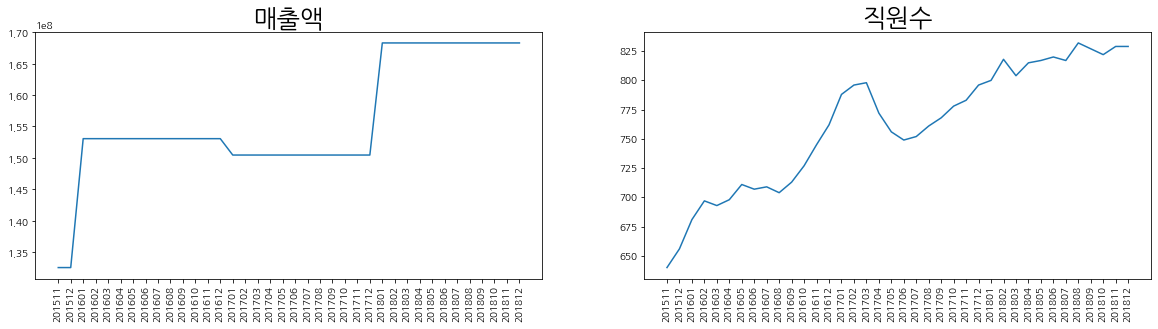



294337 회사 그래프입니다.


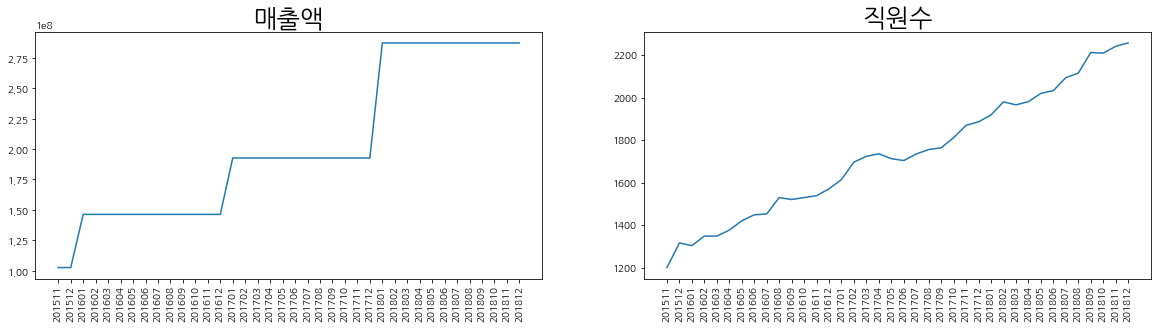



294367 회사 그래프입니다.


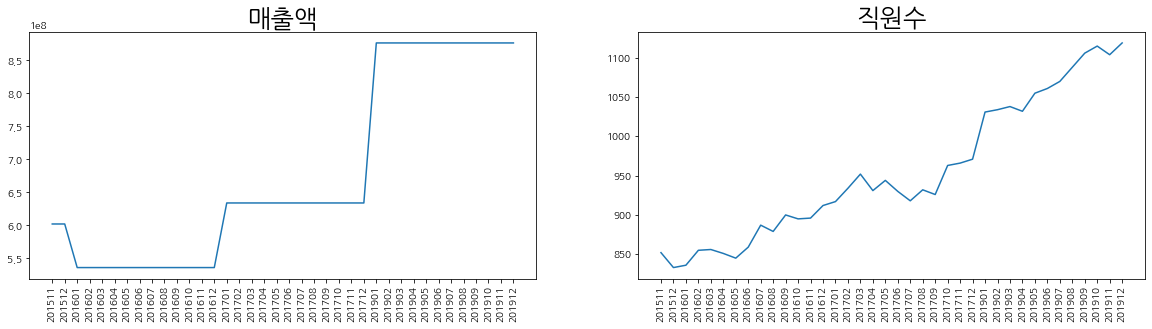



126538 회사 그래프입니다.


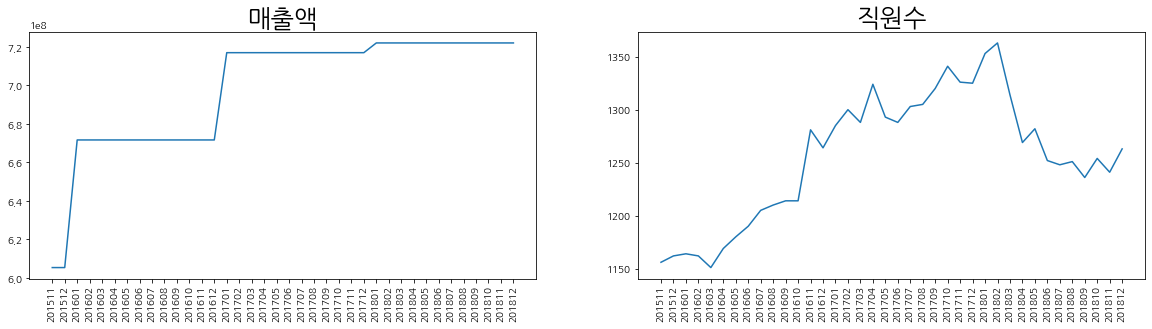



126664 회사 그래프입니다.


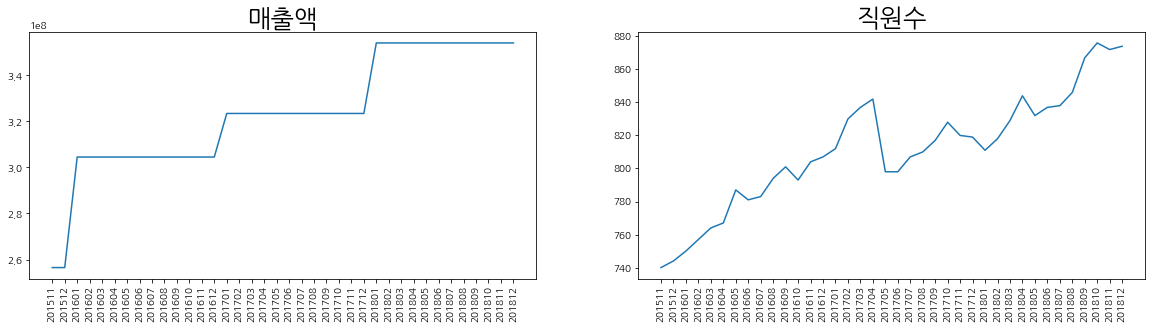



126983 회사 그래프입니다.


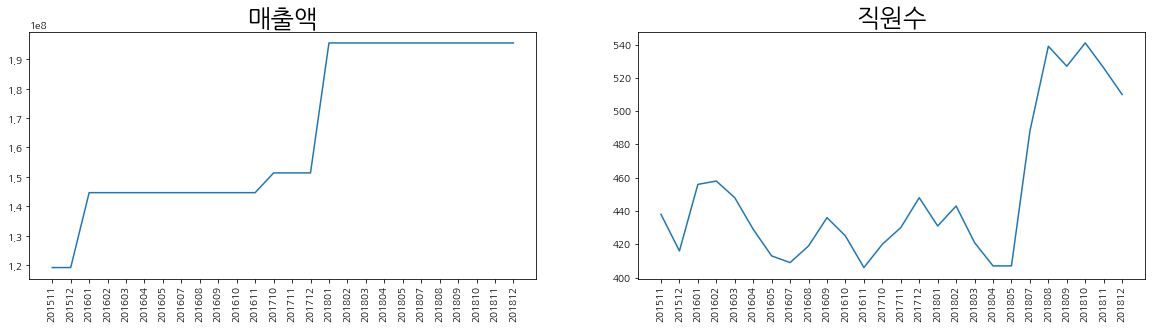



227414 회사 그래프입니다.


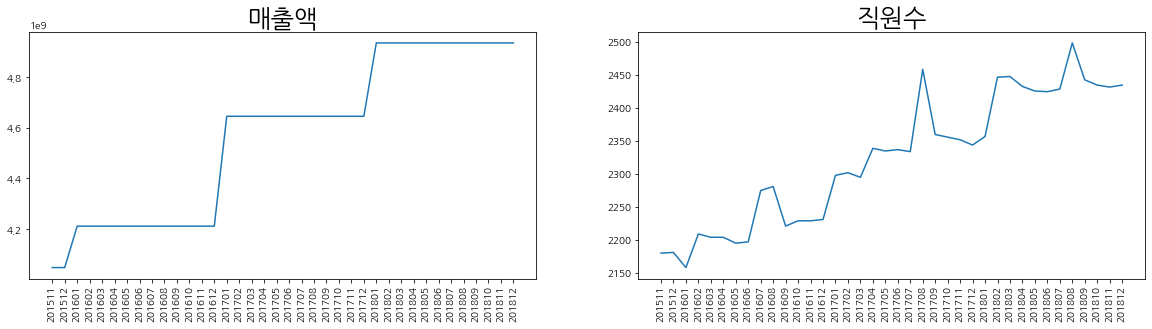



227415 회사 그래프입니다.


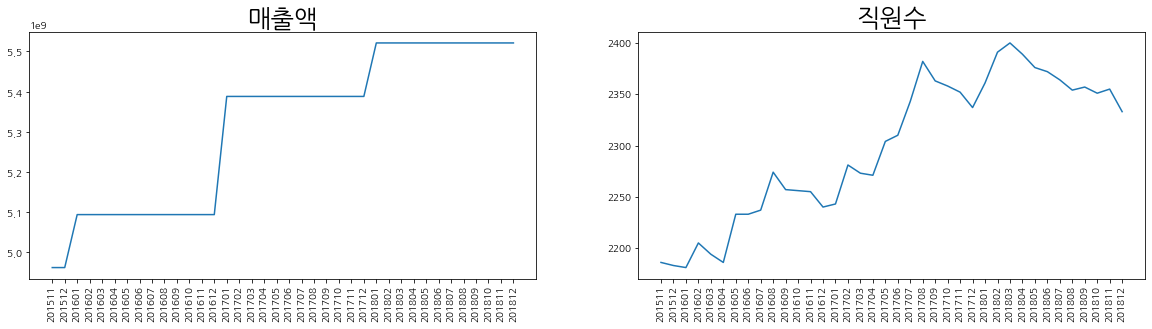



403359 회사 그래프입니다.


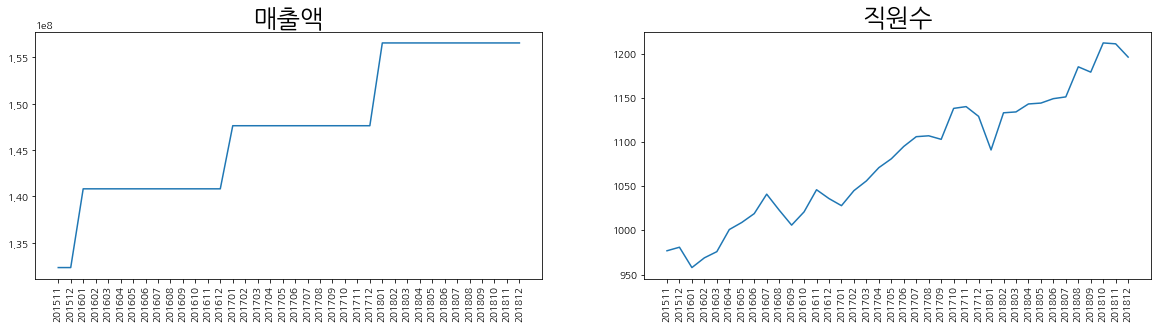



469458 회사 그래프입니다.


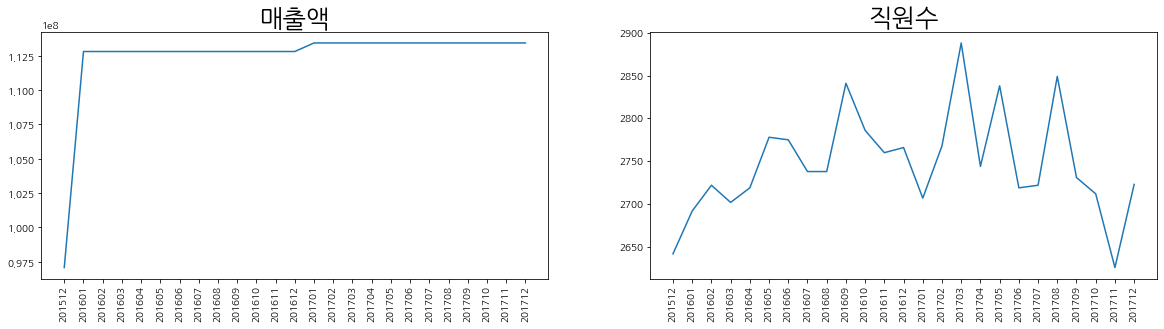



126802 회사 그래프입니다.


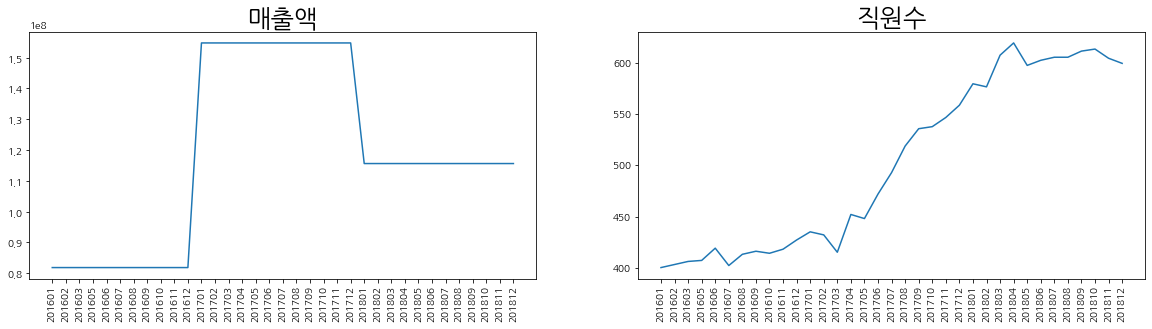



469677 회사 그래프입니다.


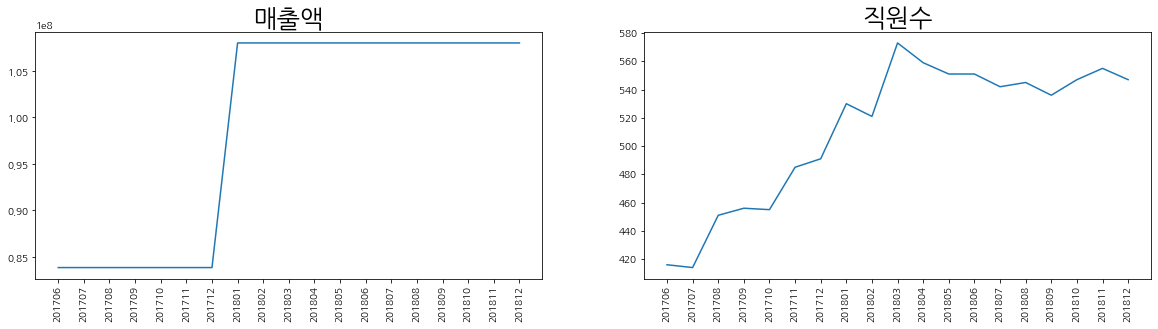

In [15]:
for x in change_worker_list :
    visualization(df,x)

# 첫번째 분석과정 종료

# 두번째 분석과정 시작

## 2. 유명 유니콘 기업들의 데이터를 크롤링한다.

### (1) 크레딧잡 기반 데이터를 크롤링한다.

In [16]:
# 코드

# 드라이버
driver = webdriver.Chrome('C:/Temp/chromedriver') # 웹드라이버 객체 생성

# 구글을 열어서 키워드 입력 후 이동
driver.get('https://kreditjob.com/') # 구글 홈페이지 내용 렌더링
time.sleep(1)


# 미리 합칠 데이터프레임을 만들어 봅시다.
all_df = pd.DataFrame(columns=['회사ID', '월별_직원수','년월','월별_평균급여'])


# 크롤링을 해봅시다
# 기업 리스트
unicorn = ['우아한형제들', '야놀자', '블랭크코퍼레이션', '뱅크웨어글로벌', '비바리퍼블리카'] 

for name in unicorn :
    
    print(name,"기업 데이터 크롤링을 진행하고 있습니다.")
    
    
    driver.get('https://kreditjob.com/') # 다시 열어줘야만 오류가 안난다...?
    time.sleep(1)
    
    # 검색
    target=driver.find_element_by_css_selector("[class = 'search-query']") # 검색창 설정
    target.send_keys(name) # 검색어 지정
    target.send_keys(Keys.ENTER) # 엔터처리
    time.sleep(4) # 홈페이지가 구성될 때까지 좀 기다려볼까요?


    # 수집할 데이터 컬럼 설정
    name_num = [] # 회사ID
    worker_num = [] # 월별_직원수
    date_num = [] # 년도
    salary_num = [] # 월별_평균급여

    for x in range(2,52):

        # 회사ID는 행마다 넣어줍시다.
        name_num.append(name)

        # 월별_직원수 클릭해서 보기 ==> 5부터 시작 / 55까지 해보자
        data = driver.find_element_by_css_selector('#lineGraph > g:nth-child('+str(x+3)+')')
        data.click()

        # 월별_직원수 가져오기
        try :
            worker_address = '#lineGraph > g.graph-popup'
            worker = driver.find_element_by_css_selector(worker_address)
            worker_text = worker.text
            check = worker_text.split(sep="\n")[1]
            worker_num.append(check)
        except :
            worker_num.append(0)


        # 클릭해서 닫기
        quit = driver.find_element_by_css_selector('#lineGraph > g.graph-popup > g > polygon:nth-child(2)')
        quit.click()

        # 날짜 끌어오기 ==> 2부터 시작 52까지 해보자
        try :
            date_address = '#groupBarGraph > g.axis.xAxis > g:nth-child('+str(x)+')'
            date = driver.find_element_by_css_selector(date_address)
            date_num.append(date.text)
        except :
            date_num.append(0)

    
    # 평균급여 페이지로 넘어가기
    salary_mean_page = driver.find_element_by_css_selector('#root > div > div.body-container > div.company-container > div.company-wrapper > div.company-contents > section.company-monthly-container > div:nth-child(2) > div > div > button.btn.btn.-default')
    salary_mean_page.click()
    
    time.sleep(2) # 렌더링할 시간은 드려야죠.
    
    # for문으로 19년도까지의 데이터를 불러옵니다.
    for y in range(6,56):

        # 평균급여 클릭해보자
        salary_popup = driver.find_element_by_css_selector('#salaryGraph > g:nth-child('+str(y)+')')
        salary_popup.click()

        # 평균급여를 가져와보자
        try :
            salary_address = '#salaryGraph > g.graph-popup'
            salary = driver.find_element_by_css_selector(salary_address)
            salary_total_text = salary.text
            salary_text = salary_total_text.split(sep='\n')[-1]
            salary_num.append(salary_text)
        except :
            salary_num.append(0)

        # 클릭해서 닫기
        quit_again = driver.find_element_by_css_selector('#salaryGraph > g.graph-popup > g > polygon:nth-child(2)')
        quit_again.click()    

    new_df = pd.DataFrame([name_num, worker_num, date_num, salary_num]) # 행 단위로 합쳐진다.
    new_df = new_df.T # 행을 열로 바꾼다
    new_df.columns = ['회사ID', '월별_직원수','년월','월별_평균급여'] # 각 열의 이름을 통합할 데이터프레임의 열과 동일하게 맞춘다.
    all_df = pd.concat([all_df, new_df]) # 각 기업의 데이터를 통합한다.


    driver.back() # 검색창으로 뒤로가기

print("크롤링이 종료되었습니다.")
print()

display(all_df)

우아한형제들 기업 데이터 크롤링을 진행하고 있습니다.
크래프톤 기업 데이터 크롤링을 진행하고 있습니다.
야놀자 기업 데이터 크롤링을 진행하고 있습니다.
블랭크코퍼레이션 기업 데이터 크롤링을 진행하고 있습니다.
뱅크웨어글로벌 기업 데이터 크롤링을 진행하고 있습니다.
비바리퍼블리카 기업 데이터 크롤링을 진행하고 있습니다.
크롤링이 종료되었습니다.



,회사ID,월별_직원수,년월,월별_평균급여
0,우아한형제들,216 명,'15 11월,"2,993,545 원"
1,우아한형제들,221 명,'15 12월,"2,974,596 원"
2,우아한형제들,219 명,'16 1월,"3,097,467 원"
3,우아한형제들,222 명,'16 2월,"2,994,015 원"
4,우아한형제들,226 명,'16 3월,"3,055,818 원"
...,...,...,...,...
45,비바리퍼블리카,264 명,'19 8월,"4,200,937 원"
46,비바리퍼블리카,272 명,'19 9월,"4,250,067 원"
47,비바리퍼블리카,298 명,'19 10월,"4,266,147 원"
48,비바리퍼블리카,310 명,'19 11월,"4,187,554 원"


### (2) 수집한 데이터를 정제한다.

In [17]:
# 데이터 정제
def cleanText(readData):
    #텍스트에 포함되어 있는 문자 제거
    number = re.sub('[^0-9]', '', readData)
    return number

# 한글 없애기
for x in range(len(all_df)):
    all_df.iloc[x][1] = cleanText(all_df.iloc[x][1])
    all_df.iloc[x][2] = str(20) + cleanText(all_df.iloc[x][2])
    all_df.iloc[x][3] = cleanText(all_df.iloc[x][3])
    
    # 만약 1~9월 사이의 데이터라면?
    if len(all_df.iloc[x][2]) == 5 :
        all_df.iloc[x][2] = all_df.iloc[x][2][:4] + str(0) + all_df.iloc[x][2][4:]
        
# 저장 후 총매출액 추가
all_df.to_excel("./테스트.xlsx")

### (3) 기존 데이터 컬럼에 맞게 전처리한다.

In [25]:
# 데이터 불러오기
real_df = pd.read_excel("./테스트.xlsx") # 총매출액을 수동으로 추가한 데이터
real_df.drop('Unnamed: 0', axis=1, inplace=True)

# NaN 값 제거
real_df.dropna(axis=0, inplace=True)

# 시계열 통일
real_df['년월'] = pd.to_datetime(real_df['년월'],format='%Y%m').dt.strftime('%Y%m')


# 월별_연금보험료 컬럼 생성
real_df['월별_연금보험료'] = (real_df['월별_직원수'] * real_df['월별_평균급여'] * 0.045).round(0)

# 평균급여 컬럼 drop
real_df = real_df.drop('월별_평균급여', axis=1)

### (4) 시각화를 진행한다.

우아한형제들 회사 그래프입니다.


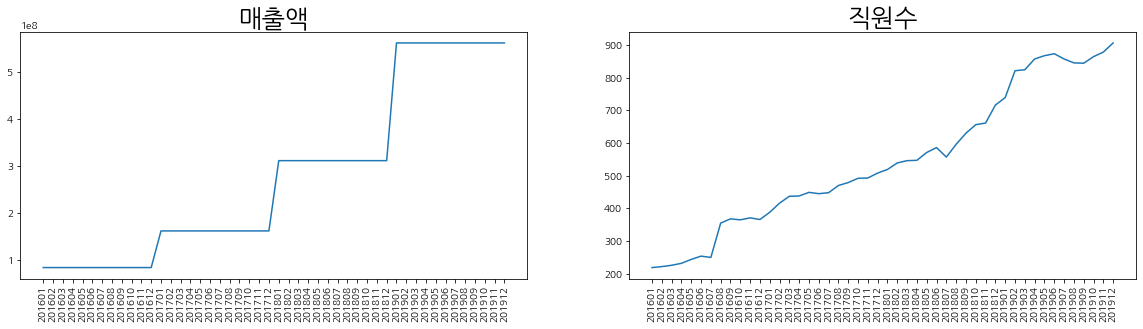



크래프톤 회사 그래프입니다.


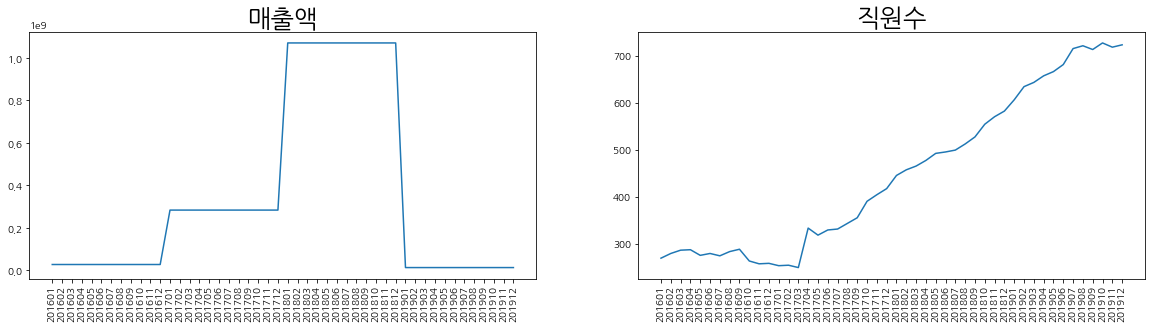



야놀자 회사 그래프입니다.


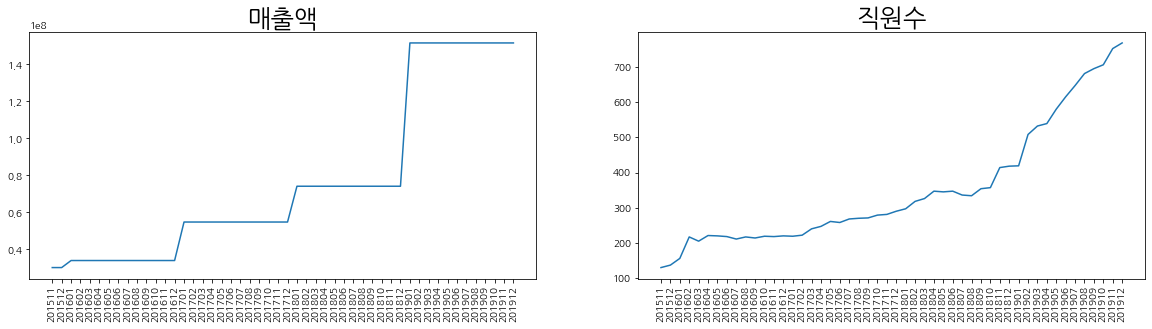



블랭크코퍼레이션 회사 그래프입니다.


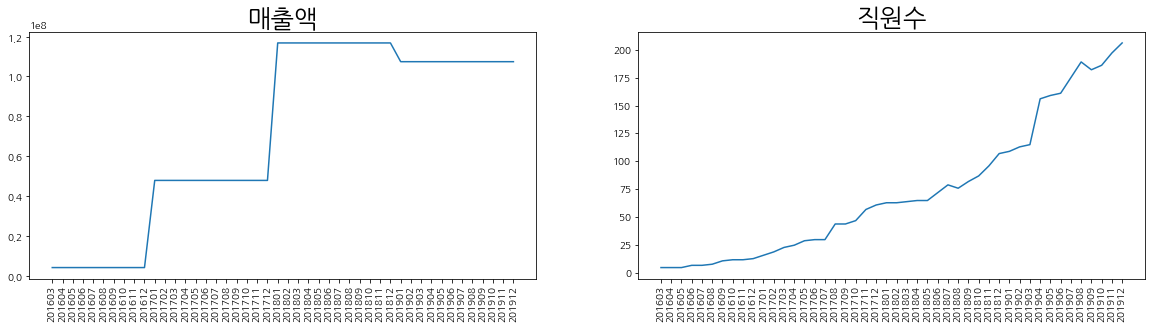



뱅크웨어글로벌 회사 그래프입니다.


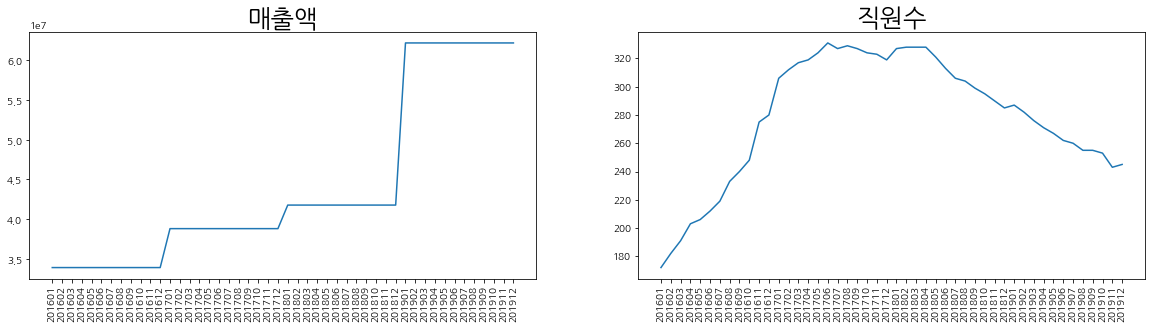



비바리퍼블리카 회사 그래프입니다.


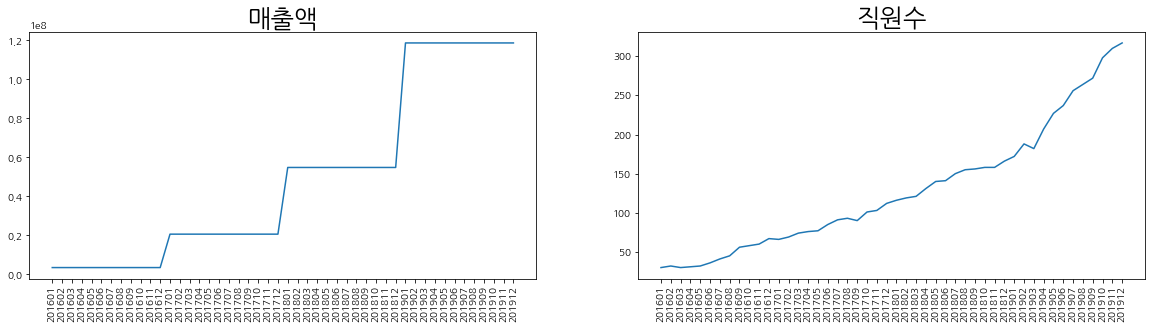

In [26]:
# 시각화 진행
list_id = real_df['회사ID'].unique()

for x in list_id :
    visualization(real_df,x)